# PHYS 267 - Assignment 3
###### Last Updated: Jan 30, 2023 by Dr. Brenda Lee
***

<font color='red'>*Important*: Remember to **show ALL your work and thought process for these problems**. Please also answer subquestions in separate cells for easier grading for the TAs. Long explanations should be in a markdown cell; short explanations (if using code) can be comments.
    
All final answers must be reported as an output (by running code or in a separate markdown cell) and not as comments. This allows the TAs to find your answers more easily.</font>

### Question 1

You are taking the hardest course on campus for an entire term (assume you take this course every single day, even on weekends). A group of students decide to see whether napping at set times during the day would improve their grades. 10 people followed this prescribed regimen and were observed for a period of one term. 8 students survived one term without failing. Let's say the probability of passing this course is 0.5 when someone doesn't nap. What is the probability of observing 8 or more successful students, given that napping is ineffective in improving grades due to its 0.5 probability? Show all your work and state which distribution this is.

Total Marks: 6

#### Q1 Solution

Impliction of last couple lines means that probability of passing is 0.5, regardless of nap or no nap. Or in other words independent of it, and just looking at the probability of 8 or more people passing in general. We can use binomial distribution.


In [1]:
from scipy.stats import binom
k = 8
n = 10
p = 0.5

print("The probability of 8 or more students passing is",binom.pmf(k, n, p)+binom.sf(k, n, p)) # sf is same as 1-cdf documentation claims it is more accurate






The probability of 8 or more students passing is 0.05468749999999997


### Question 2

Consider a Poisson random variable $X$ with $\mu=3$. Use the Poisson formula to calculate the following probabilities and to answer the following questions. It is expected that you use Python code to help solve for these.

1. $P(X=0)$
2. $P(X=1)$
3. $P(X>1)$
4. $P(X\le3)$
5. $P(3\le X \le 5)$
6. Plot the PMF as a histogram or bar chart with at least 10 bins and 100 values

Total Marks: 15

#### Q2.1 Solution

In [2]:
from scipy.stats import poisson

μ = 3

pd1= poisson.pmf(0, μ)

print(pd1)


0.049787068367863944


#### Q2.2 Solution

In [3]:
pd2= poisson.pmf(2, μ)
print(pd2)


0.22404180765538775


#### Q2.3 Solution

In [4]:
pd3 = 1-poisson.cdf(1,μ)
print(pd3)

0.8008517265285442


#### Q2.4 Solution

In [5]:
pd4 = poisson.cdf(3,μ)
print(pd4)


0.6472318887822313


#### Q2.5 Solution

In [6]:
pd5 = poisson.cdf(5,μ) - poisson.cdf(3,μ)
print(pd5)

0.2688501691864653


#### Q2.6 Solution

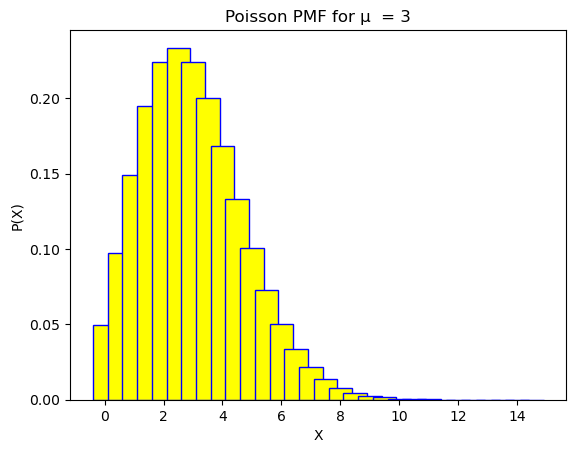

In [7]:
import matplotlib.pyplot as plt, numpy as np
μ = 3
x = np.arange(0,15,0.5)
y = poisson.pmf(x,μ)

plt.bar(x, y, color = "yellow", edgecolor = "blue")
plt.title("Poisson PMF for μ  = 3")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.show()

### Question 3

The discharge of suspended solids from a phosphate mine is normally distributed, with a mean daily discharge of 18 milligrams per litre (mg/L) and a standard deviation of 12 mg/L. What proportion of days will the daily discharge exceed 43 mg/L?

Total Marks: 6

#### Solution

In [8]:
from scipy.stats import norm
mu = 18
sigma = 12
x = 43

# for P(X>43) we can use 1- normal cdf or sf (sf is 1-cdf)
PDischarge = norm.sf(x, mu, sigma)
print(PDischarge)

0.018610425189886332


### Question 4

Your pulse rate is a measure of the number of heartbeats per minute. A normal pulse rate is between 60 and 100 beats per minute for children over 10 and adults. Assume that these pulse rates are distributed normally with a mean of 78 and a standard deviation of 12. Answer the following questions.

1. What proportion of adults will have pulse rates between 60 and 100? [5 marks]
2. What is the 95% percentile for the pulse rates of adults? [4 marks]
3. Would a pulse rate of 110 be considered unusual? Explain. [2 marks]
4. Plot this distribution. Show your work, explain your steps, and label everything. [6 marks]

Total Marks: 17

#### Q4.1 Solution

In [9]:
Pmu = 78
Psigma = 12

P_60_100= norm.cdf(100, Pmu, Psigma) - norm.cdf(60, Pmu, Psigma)
print("Probability of pulse rates between 60 and 100 is:", P_60_100)

Probability of pulse rates between 60 and 100 is: 0.8998162911463247


#### Q4.2 Solution

In [10]:
#ppf is the inverse of cdf, hence using ppf we get

P95 = norm.ppf(0.95, Pmu, Psigma)
print("The 95 percentile value for pulsee rates:",P95)

The 95 percentile value for pulsee rates: 97.73824352341767


#### Q4.3 Solution

yes 110bpm would be considered unusual since it's much higher than even the 95th percentile which is 97.7bpm. even with mean+std we get 90bpm which less that 95 percentile (as expected) which is less than 110bpm.


In [11]:
norm.cdf(110, Pmu,Psigma)

0.9961696194324102

#### Q4.4 Solution

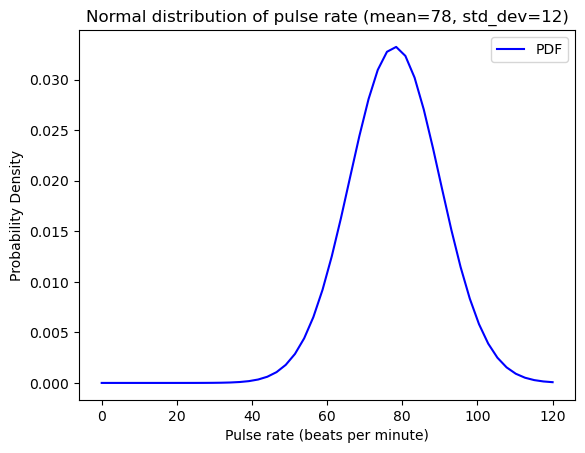

In [12]:
X_p = np.linspace(0, 120)
pdf = norm.pdf(X_p, Pmu, Psigma)

plt.plot(X_p, pdf, 'b', label='PDF')
plt.xlabel('Pulse rate (beats per minute)')
plt.ylabel('Probability Density')
plt.title('Normal distribution of pulse rate (mean=78, std_dev=12)')
plt.legend()
plt.show()